In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud


data= pd.read_csv('data/bbc_news_text_complexity_summarization.csv')
data.head()

,text,labels,no_sentences,Flesch Reading Ease Score,Dale-Chall Readability Score,text_rank_summary,lsa_summary
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,26,62.17,9.72,It hopes to increase subscribers by offering t...,Its profits were buoyed by one-off gains which...
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,17,65.56,9.09,The dollar has hit its highest level against t...,"""I think the chairman's taking a much more san..."
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,14,69.21,9.66,The owners of embattled Russian oil giant Yuko...,Yukos' owner Menatep Group says it will ask Ro...
3,High fuel prices hit BA's profits\n\nBritish A...,business,24,62.98,9.86,Looking ahead to its full year results to Marc...,"Rod Eddington, BA's chief executive, said the ..."
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,17,70.63,10.23,Reports in the Wall Street Journal and the Fin...,Shares in UK drinks and food firm Allied Domec...


In [10]:
data.columns

Index(['text', 'labels', 'no_sentences', 'Flesch Reading Ease Score',
       'Dale-Chall Readability Score', 'text_rank_summary', 'lsa_summary'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   text                          2127 non-null   object 
 1   labels                        2127 non-null   object 
 2   no_sentences                  2127 non-null   int64  
 3   Flesch Reading Ease Score     2127 non-null   float64
 4   Dale-Chall Readability Score  2127 non-null   float64
 5   text_rank_summary             2127 non-null   object 
 6   lsa_summary                   2127 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 116.4+ KB


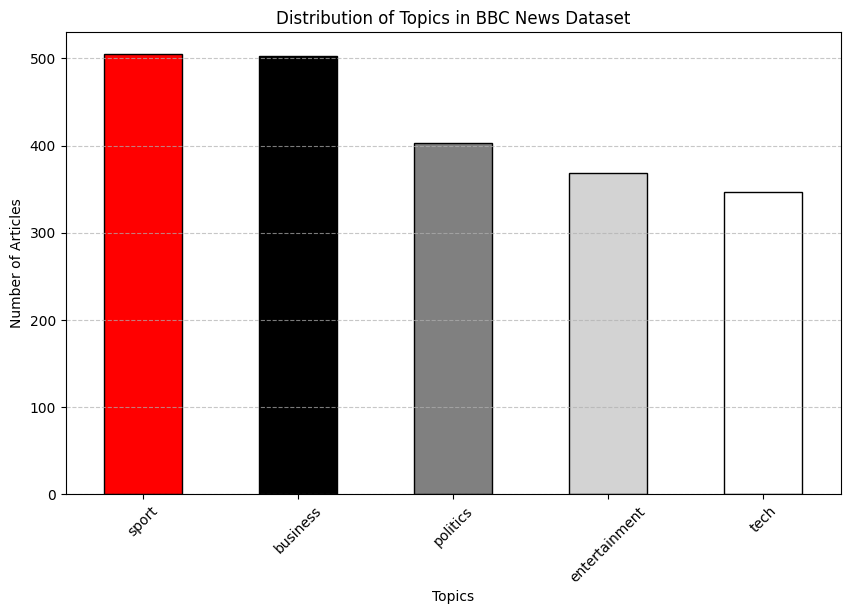

In [3]:
import matplotlib.pyplot as plt

# Define colors based on user preference
colors = ['#FF0000', '#000000', '#808080', '#D3D3D3', '#FFFFFF']  # red, black, gray, light gray, white

# Plot topic distribution
plt.figure(figsize=(10, 6))
data['labels'].value_counts().plot(kind='bar', color=colors, edgecolor='black')
plt.title('Distribution of Topics in BBC News Dataset')
plt.xlabel('Topics')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


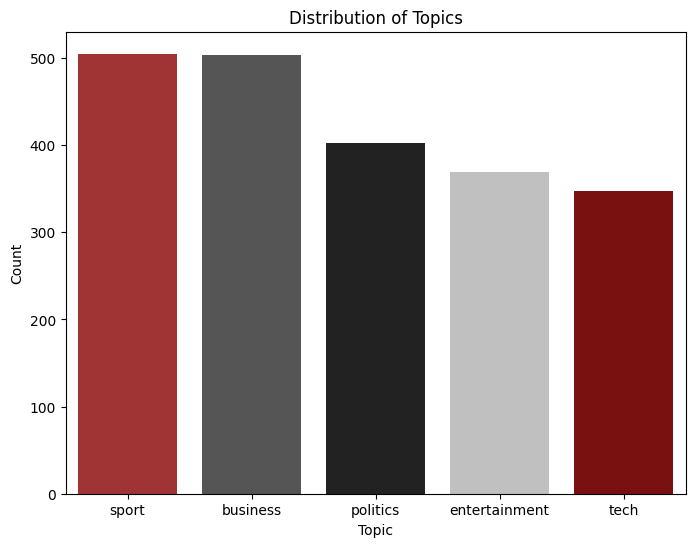

In [13]:
# Adjusting the colors for the distribution of topics plot
plt.figure(figsize=(8, 6))
sns.countplot(x='labels', data=data, order=data['labels'].value_counts().index, palette=['#B22222', '#555555', '#222222', '#C0C0C0', '#8B0000'])
plt.title('Distribution of Topics', color='black')
plt.xlabel('Topic', color='black')
plt.ylabel('Count', color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.show()

The bar chart illustrates the distribution of articles across five topics in the BBC News dataset: Sport, Business, Politics, Entertainment, and Tech. The dataset is relatively balanced, with Sport and Business topics having the highest representation, each around 500 articles. Politics follows closely, while Entertainment and Tech have fewer entries. This balanced distribution suggests that the dataset is well-suited for classification tasks, as each topic has a comparable number of samples. However, slight imbalances could impact the model’s accuracy for less-represented categories like Tech.

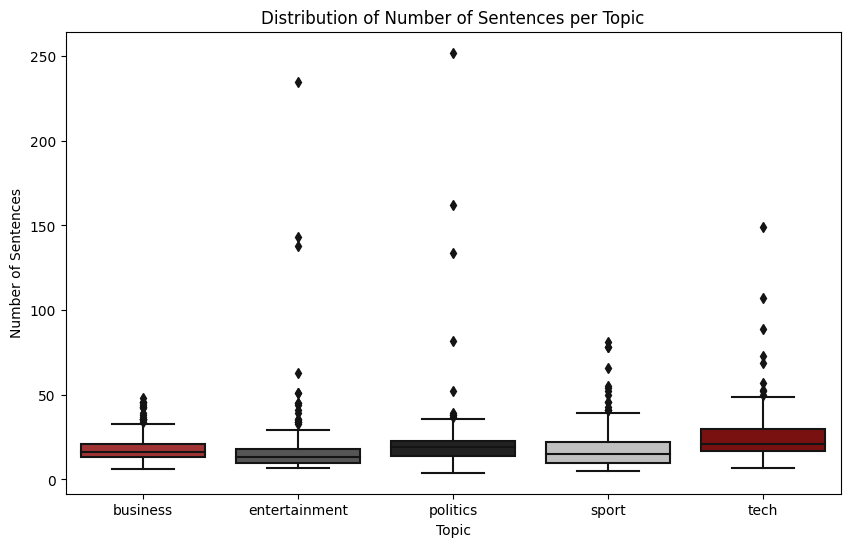

In [14]:
# Adjusting the colors for the boxplot of number of sentences per topic
plt.figure(figsize=(10, 6))
sns.boxplot(x='labels', y='no_sentences', data=data, palette=['#B22222', '#555555', '#222222', '#C0C0C0', '#8B0000'])
plt.title('Distribution of Number of Sentences per Topic', color='black')
plt.xlabel('Topic', color='black')
plt.ylabel('Number of Sentences', color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.show()

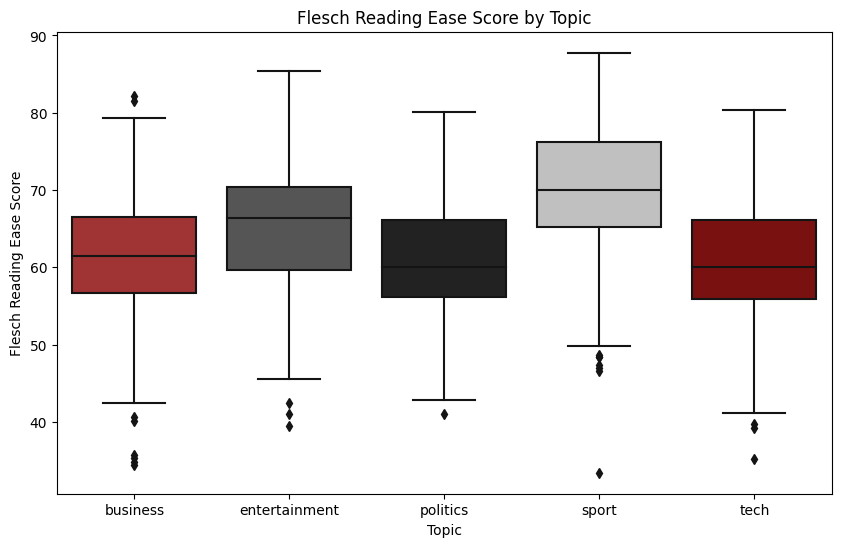

In [15]:
# Adjusting the colors for Flesch Reading Ease Score per topic
plt.figure(figsize=(10, 6))
sns.boxplot(x='labels', y='Flesch Reading Ease Score', data=data, palette=['#B22222', '#555555', '#222222', '#C0C0C0', '#8B0000'])
plt.title('Flesch Reading Ease Score by Topic', color='black')
plt.xlabel('Topic', color='black')
plt.ylabel('Flesch Reading Ease Score', color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.show()

The box plot shows the Flesch Reading Ease Score distribution for each topic, providing insights into readability:

Politics and Business articles have a wider range and tend to have lower readability scores, suggesting they are more complex.
Entertainment and Sport articles generally have higher readability scores, indicating simpler language, which might make them more accessible to a broader audience.
Tech articles have a mid-range readability, likely due to specific terminology but generally accessible language.
These readability variations may affect classification accuracy, as certain topics might have more distinctive linguistic patterns.

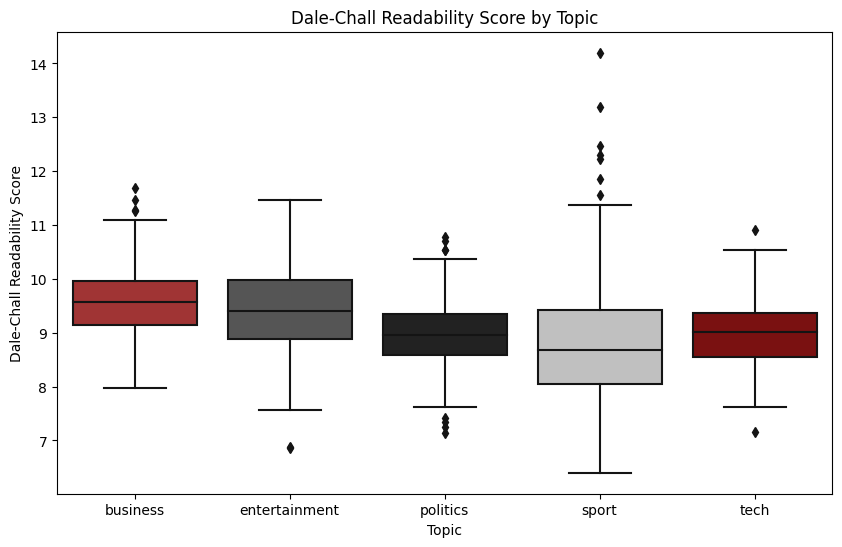

In [16]:
# Adjusting the colors for Dale-Chall Readability Score per topic
plt.figure(figsize=(10, 6))
sns.boxplot(x='labels', y='Dale-Chall Readability Score', data=data, palette=['#B22222', '#555555', '#222222', '#C0C0C0', '#8B0000'])
plt.title('Dale-Chall Readability Score by Topic', color='black')
plt.xlabel('Topic', color='black')
plt.ylabel('Dale-Chall Readability Score', color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.show()

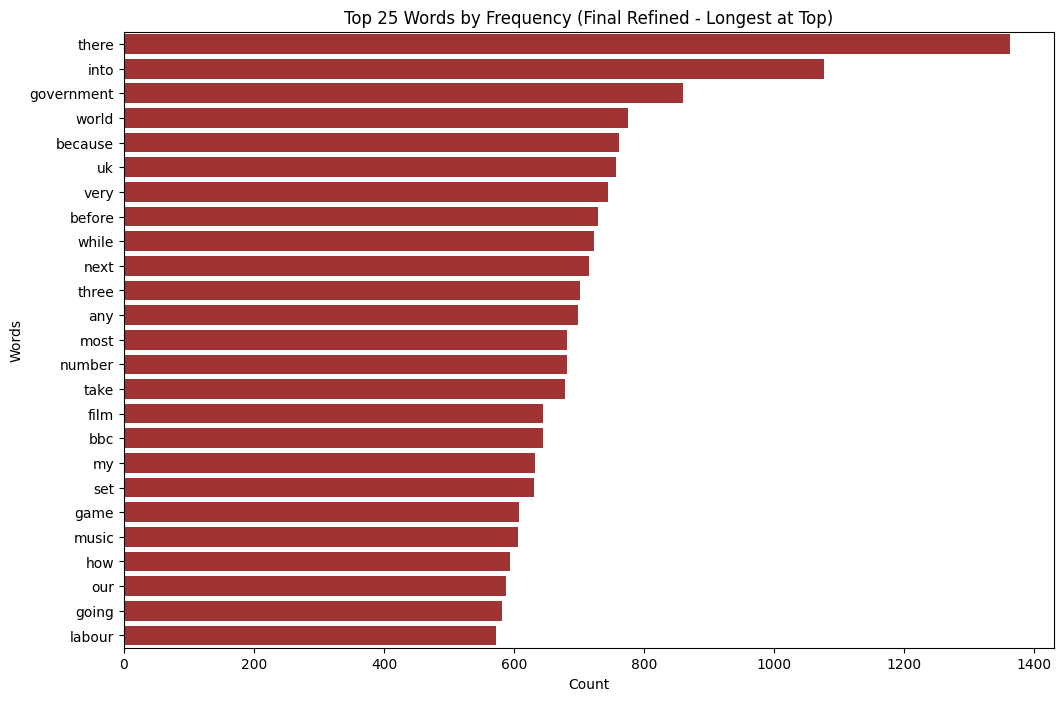

In [9]:
# Combine all text into a single string and split into words
all_words = " ".join(data['text']).lower().split()

# Define an extended set of stopwords to remove common, meaningless words
extended_stopwords = set([
    'the', 'and', 'to', 'of', 'in', 'for', 'that', 'on', 'with', 'as', 'is', 
    'was', 'at', 'by', 'an', 'be', 'this', 'which', 'or', 'from', 'but', 'it', 
    'are', 'not', 'have', 'has', 'had', 'we', 'will', 'can', 'more', 'about', 
    'their', 'been', 'after', 'they', 'you', 'all', 'out', 'up', 'if', 'who', 'what',
    'he', 'said', 'his', 'mr', 'she', 'her', 'they', 'them', 'its', 
    'would', 'one', 'could', 'new', 'also', 'people', 'us', 'over', 'first', 
    'last', 'two', 'may', 'many', 'much', 'even', 'make', 'made', 'time', 
    'year', 'years', 'still', 'know', 'back', 'way', 'right', 'say', 'day', 'days',
    'now', 'so', 'like', 'a', 'i', 'just', 'only', 'get', 'told', 'no', 'do', 'such', 
    'best', 'being', 'other', 'some', 'when', 'were', 'than', 'against', 'should', 
    't', 'yes', 'said', 'well'
])

# Filter out stopwords
filtered_words_final = [word for word in all_words if word.isalpha() and word not in extended_stopwords]
word_counts_final = Counter(filtered_words_final)

# Get the 25 most common words and sort them in descending order of frequency
top_25_words_final = word_counts_final.most_common(25)
words_sorted, counts_sorted = zip(*sorted(top_25_words_final, key=lambda x: x[1], reverse=True))

# Plot the final refined top 25 words in a horizontal bar chart with the longest bar at the top
plt.figure(figsize=(12, 8))
sns.barplot(y=list(words_sorted), x=list(counts_sorted), palette=['#B22222']*25)
plt.title('Top 25 Words by Frequency (Final Refined - Longest at Top)', color='black')
plt.xlabel('Count', color='black')
plt.ylabel('Words', color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.show()

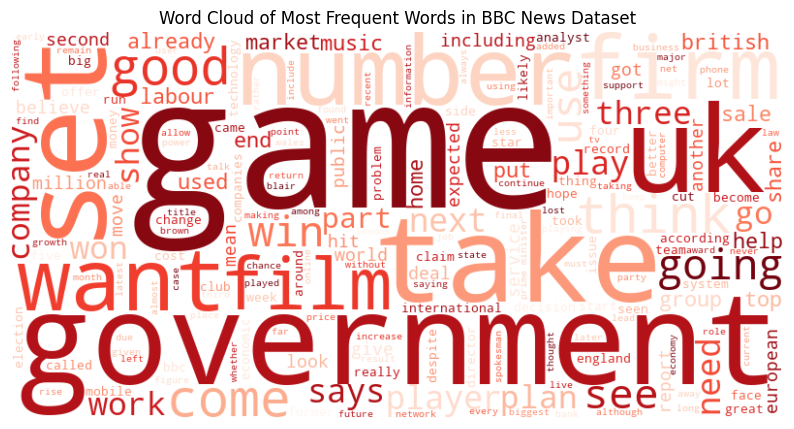

In [7]:
from collections import Counter

# Recreate all_words by combining all text entries
all_words = " ".join(data['text']).lower().split()

# Define extended stopwords as specified
extended_stopwords = set([
    'the', 'and', 'to', 'of', 'in', 'for', 'that', 'on', 'with', 'as', 'is', 
    'was', 'at', 'by', 'an', 'be', 'this', 'which', 'or', 'from', 'but', 'it', 
    'are', 'not', 'have', 'has', 'had', 'we', 'will', 'can', 'more', 'about', 
    'their', 'been', 'after', 'they', 'you', 'all', 'out', 'up', 'if', 'who', 'what',
    'he', 'said', 'his', 'mr', 'she', 'her', 'they', 'them', 'its', 
    'would', 'one', 'could', 'new', 'also', 'people', 'us', 'over', 'first', 
    'last', 'two', 'may', 'many', 'much', 'even', 'make', 'made', 'time', 
    'year', 'years', 'still', 'know', 'back', 'way', 'right', 'say', 'day', 'days',
    'now', 'so', 'like', 'a', 'i', 'just', 'only', 'get', 'told', 'no', 'do', 'such', 
    'best', 'being', 'other', 'some', 'when', 'were', 'than', 'against', 'should', 
    't', 'yes', 'said', 'well'
])

# Filter out stopwords
filtered_words_final = [word for word in all_words if word.isalpha() and word not in extended_stopwords]

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(" ".join(filtered_words_final))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words in BBC News Dataset', color='black')
plt.show()
